# Graph Analysis - I

The new import we are doing in this class is networkx:

http://networkx.github.io/documentation/latest/tutorial/

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.svm as svm
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import networkx as nx

import seaborn as sns
%matplotlib inline

## Basic graph concepts in NetworkX

__Undirected Graphs__

In [3]:
g = nx.Graph()

Adding to the graph one node at a time

In [4]:
g.add_node(1)

Adding multiple nodes at a time

In [5]:
g.add_nodes_from([2,3])

Nodes are objects themselves

In [6]:
g.add_node('ET')
g.nodes()

[1, 2, 3, 'ET']

Nodes can also be removed

In [7]:
g.remove_node(1)
g.nodes()

[2, 3, 'ET']

Adding edges to the graph

In [8]:
g.add_edge(1,2)
g.add_edge(3,'ET')
g.add_edges_from([(2,3), (1,3)])
g.edges()

[(1, 2), (1, 3), (2, 3), (3, 'ET')]

In [9]:
g.nodes()

[1, 2, 3, 'ET']

Removing edges

In [10]:
g.remove_edge(1,2)
g.edges()

[(1, 3), (2, 3), (3, 'ET')]

In [11]:
g.nodes()

[1, 2, 3, 'ET']

Neighbors, degrees etc.

In [12]:
g.neighbors(1)

[3]

In [13]:
g.degree(1)

1

Any `networkx` graph behaves like a Python dictionary with nodes as primary keys.

In [14]:
g.add_node(1, time='5pm')

In [15]:
g.node[1]['time']

'5pm'

In [16]:
g.node[1] # Python dictionary

{'time': '5pm'}

The special edge attribute "weight" should always be numeric and holds values used by
algorithms requiring weighted edges. 

In [17]:
g.add_edge(1, 2, weight=4.0 )

In [18]:
g[1][2]['weight'] = 5.0 # edge already added 

In [19]:
g[1][2]

{'weight': 5.0}

__Node and edge iterators.__

In [20]:
for node in g:
    print('nodeid: ', node, '\t degree:', g.degree(node))

nodeid:  1 	 degree: 2
nodeid:  2 	 degree: 2
nodeid:  3 	 degree: 3
nodeid:  ET 	 degree: 1


In [21]:
g.edges(data=True)

[(1, 2, {'weight': 5.0}), (1, 3, {}), (2, 3, {}), (3, 'ET', {})]

__Directed Graphs.__

Add the nodes from any container (a list, dict, set or even the lines from a file or the nodes from another graph).

In [22]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(range(100,110))
H=nx.Graph()
H.add_path([0,1,2,3,4,5,6,7,8,9])
G.add_nodes_from(H)

In [23]:
G.nodes()

[0,
 1,
 2,
 3,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 8,
 9,
 7,
 4,
 6,
 5]

G can also grow by adding edges

In [24]:
G.add_edge(1, 2)
G.add_edges_from([(1,2),(1,3)])
G.add_edges_from(H.edges())

In [25]:
G.edges()

[(0, 1),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (8, 9),
 (7, 8),
 (4, 5),
 (6, 7),
 (5, 6)]

__Attributes.__

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named graph, node and edge respectively.

In [26]:
G = nx.DiGraph(day="Friday")
G.graph

{'day': 'Friday'}

Add node attributes using add_node(), add_nodes_from() or G.node

In [27]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.node[1])
G.node[1]['room'] = 714
del G.node[1]['room'] # remove attribute
G.nodes(data=True)

{'time': '5pm'}


[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

Add edge attributes using add_edge(), add_edges_from(), subscript notation, or G.edge.

In [28]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4
G.edges(data=True)

[(1, 2, {'color': 'blue', 'weight': 4}),
 (2, 3, {'weight': 8}),
 (3, 4, {'color': 'red'}),
 (4, 5, {'color': 'red'})]

Many common graph features allow python syntax to speed reporting.

In [29]:
1 in G     # check if node in graph

True

In [30]:
[n for n in G if n<3]   # iterate through nodes

[1, 2]

In [31]:
len(G)  # number of nodes in graph

5

In [32]:
print(G[1]) # adjacency dict keyed by neighbor to edge attributes
            # Note: you should not change this dict manually!

{2: {'color': 'blue', 'weight': 4}}


Iterating over the edges of a graph

In [33]:
for n,nbrsdict in G.adjacency_iter():
    for nbr,eattr in nbrsdict.items():
        if 'weight' in eattr:
            print (n,nbr,eattr['weight'])

1 2 4
2 3 8


or

In [34]:
[ (u,v,edata['weight']) for u,v,edata in G.edges(data=True) if 'weight' in edata ]

[(1, 2, 4), (2, 3, 8)]

## Visualizing Graphs

Visualizing a network can be quite difficult.  There are many strategies that are used to draw networks in ways that communicate as much insight as possible.

In [35]:
Ggml = nx.read_gml('data/polblogs.gml')

This is a directed network of hyperlinks between weblogs on US politics, recorded in 2005.  Accessible [here](http://www-personal.umich.edu/~mejn/netdata/).

In [36]:
print(len(Ggml.nodes()))
print(len(Ggml.edges()))

1490
19015


This is a fairly large network to try to visualize.

The standard `networkx` routine uses what is called a 'spring' layout.   Each edge has a `weight` parameter.  The layout routine fixes a spring of that length between the nodes, and a repulsive force between each pair of nodes, and then lets the set of all forces reach its minimum energy state.  This is a kind of minimal distortion in a least-squares sense.



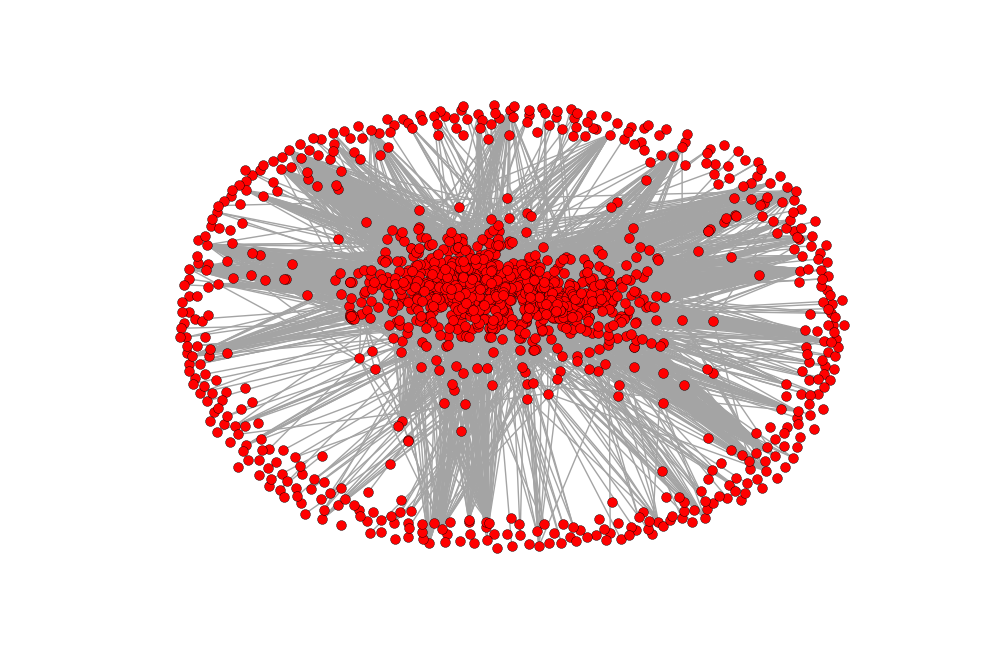

In [37]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(Ggml, edge_color='#a4a4a4', node_size=50, with_labels=False, arrows=False)
    plt.axis('off')

The other kinds of layouts that are possible:
* `circular_layout` - position nodes on a circle
* `random_layout` - position nodes randomly in the unit square
* `shell_layout` - position nodes in concentric circles
* `spectral_layout` - uses the eigenvectors of the graph Laplacian

Note that `networkx` is not intended as a sophisticated graph visualization package.  There are more sophisticate packages avaiable that do much more.  Some examples include 
* graphviz
* gephi
* cytoscape

__Looking for Clusters.__

This graph models American football games between NCAA Div IA colleges in Fall 2000 (from [here](http://cise.ufl.edu/research/sparse/matrices/Newman/football.html)). 

Each vertex represents a football team, which belongs to a specific conference (Big Ten, Conference USA, Pac-10, etc.). 

An edge between two vertices $v_1$ and $v_2$ means that the two teams played each other; the weight of the edge ($v_1$, $v_2$) is equal to the number of times they played each other.

In [38]:
with open('data/football.txt', 'r') as f:
   football =  nx.parse_edgelist(f, comments='#', nodetype=int, data=False)

In [39]:
print('This network has {} nodes and {} edges'.format(len(football.nodes()),len(football.edges())))

This network has 115 nodes and 613 edges


Let's start with a circular layout:

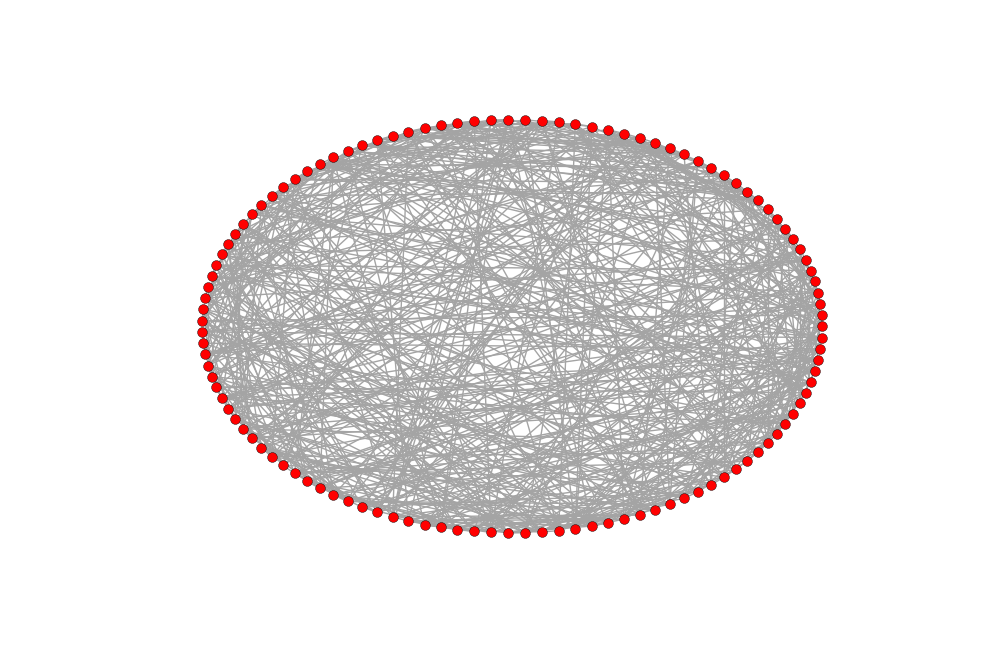

In [40]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, pos=nx.circular_layout(football), edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

Now, let's compare the standard spring model layout:

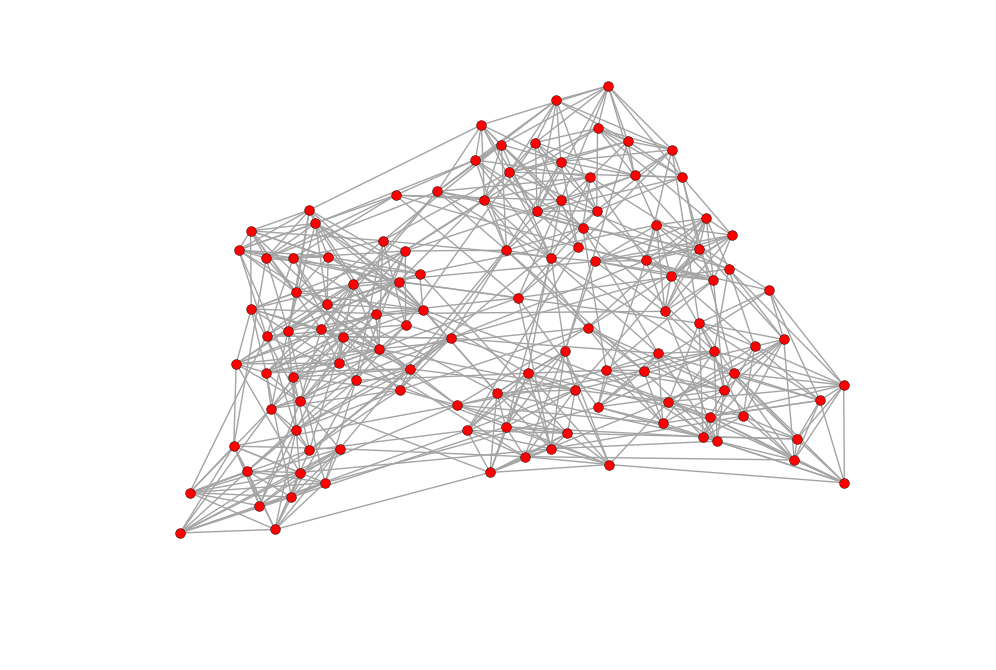

In [41]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

Notice how the spring layout tends to bring clusters of densely connected nodes close to each other.

Finally, we can try the spectral layout:

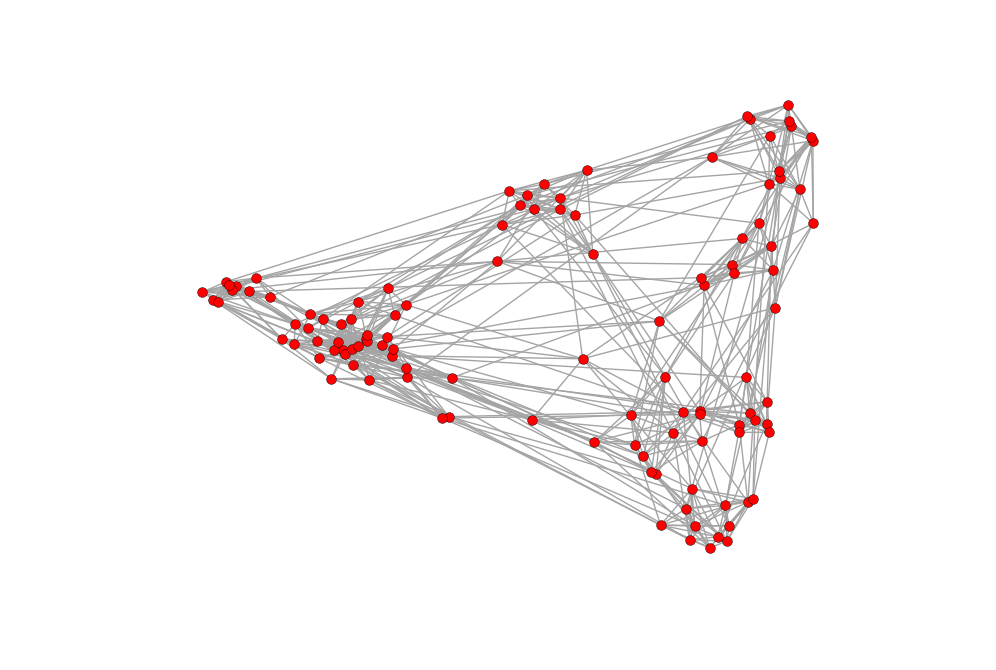

In [42]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(football, pos=nx.spectral_layout(football), edge_color='#a4a4a4', node_size=50, with_labels=False)
    plt.axis('off')

The spectral layout enhances the clustering of densely connected groups.

#### Generating graphs using the routines already available in python (for small data)

Networkx has a wealth of data-generation routines that can be found here:
    
    https://networkx.github.io/documentation/latest/reference/generators.html

This is the function that generates the Zachary's Karate club network data

In [43]:
kn=nx.karate_club_graph()

In [44]:
num_nodes = kn.number_of_nodes()
print('number of nodes: ' + str(num_nodes))
num_edges = kn.number_of_edges()
print('number of edges: ' + str(num_edges))

number of nodes: 34
number of edges: 78


Visualizing the network:

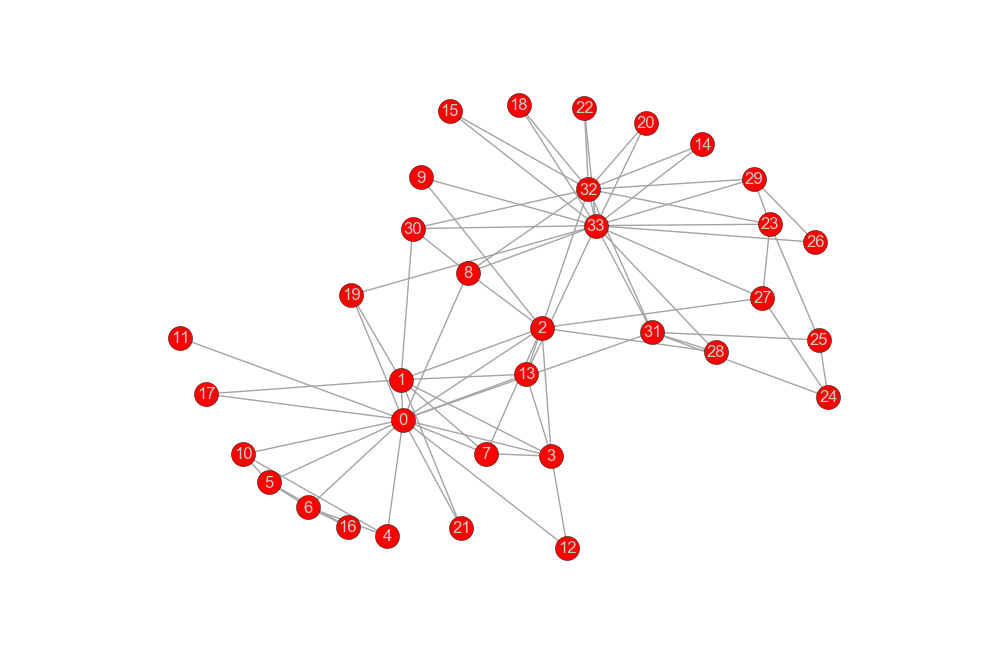

In [45]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(kn, edge_color='#a4a4a4', with_labels=True, font_color='#cacaca')
    plt.axis('off')

number of nodes: 15
number of edges: 20


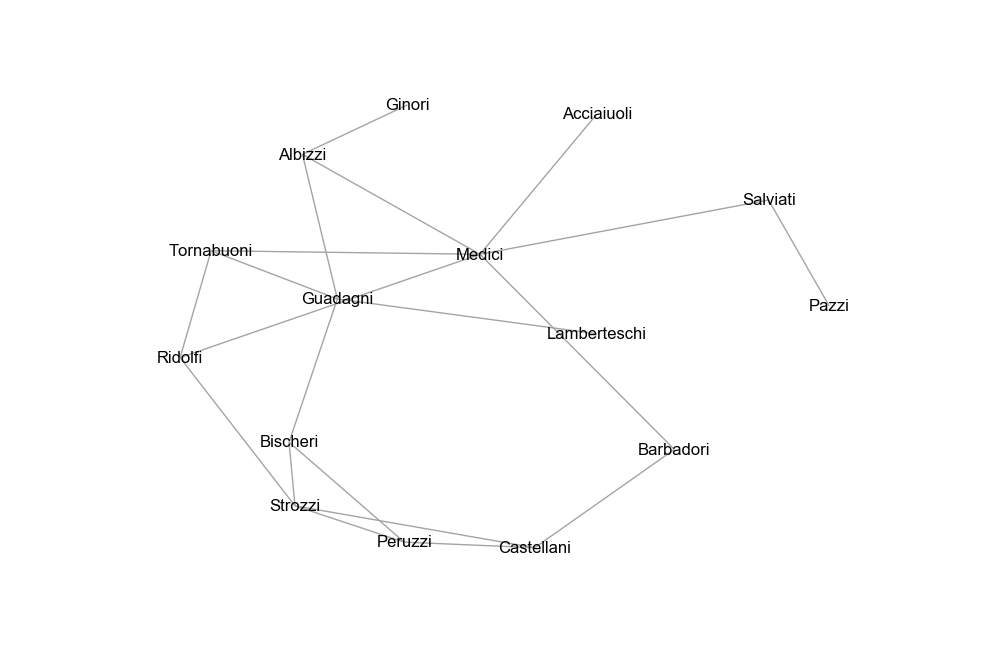

In [46]:
fl = nx.florentine_families_graph()
num_nodes = fl.number_of_nodes()
print('number of nodes: ' + str(num_nodes))
num_edges = fl.number_of_edges()
print('number of edges: ' + str(num_edges))
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(fl, edge_color='#a4a4a4', node_size=0, with_labels=True)
    plt.axis('off')


__Erdos-Renyi random graphs.__

Recall that an Erdos-Renyi random graph has two parameters: 
* $n$, the number of nodes in the graph, and
* $p$, the probability that any given pair of nodes is connected by an edge.

These graphs are sometimes called $G(n,p)$ graphs.

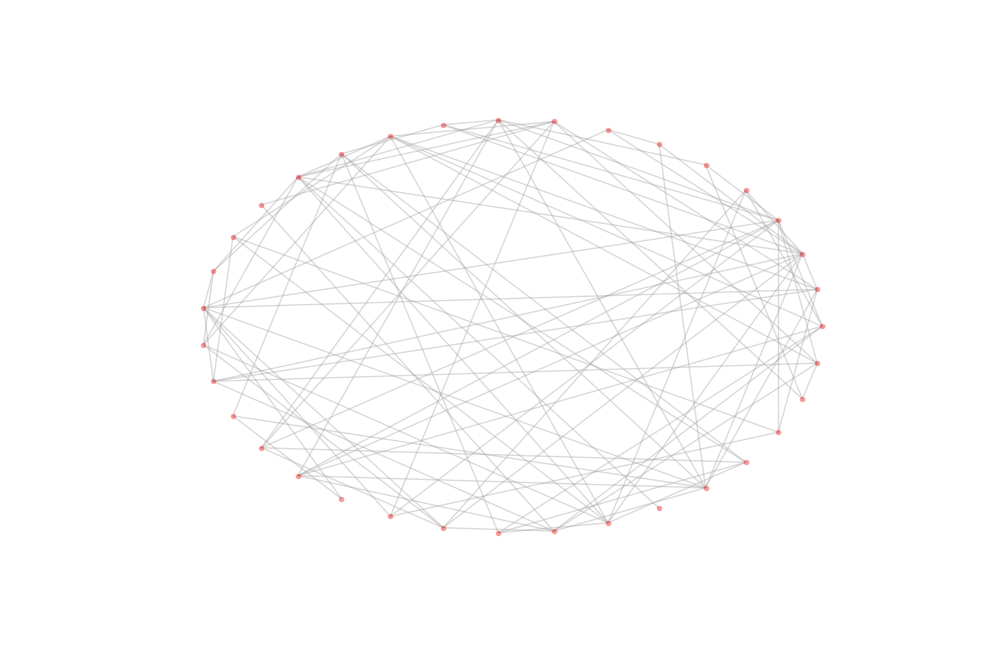

In [47]:
er2=nx.erdos_renyi_graph(35,0.15)
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(er2, node_size=15, edge_color='#a4a4a4', pos=nx.circular_layout(er2), with_labels=False, alpha=.4, linewidths=0)
    plt.axis('off')

Let's look at a bigger E-R graph:

In [48]:
er=nx.erdos_renyi_graph(1000,0.15)

In [49]:
er=nx.erdos_renyi_graph(1000,0.15)
print("Number of nodes in the random graph: ", er.number_of_nodes())
print("Number of edges in the random graph: ", er.number_of_edges())

Number of nodes in the random graph:  1000
Number of edges in the random graph:  74848


Visualizing with spring model:

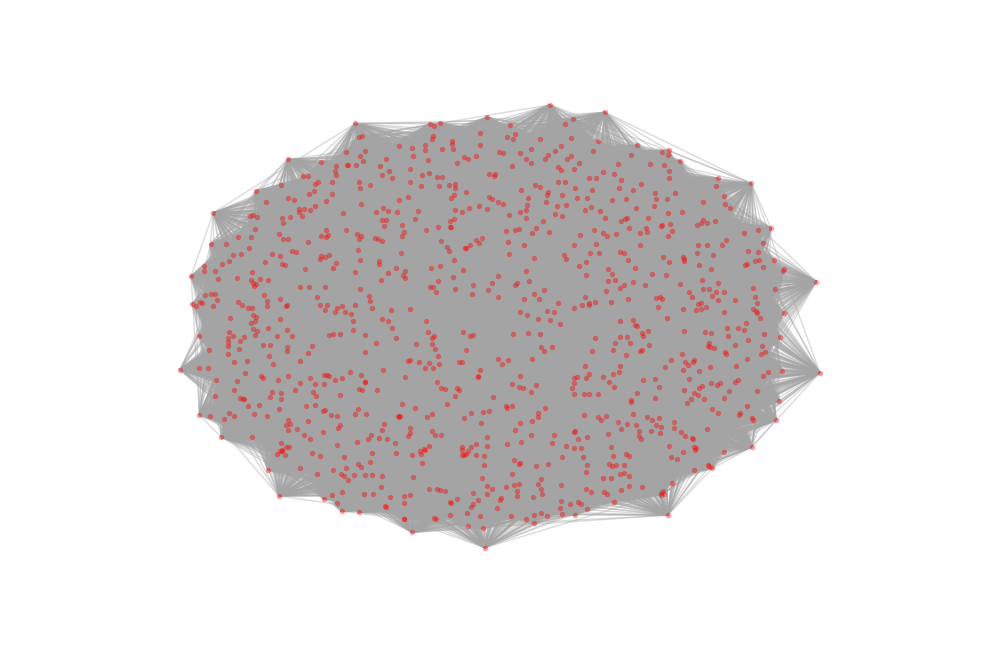

In [50]:
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(er, node_size=15, edge_color='#a4a4a4', with_labels=False, alpha=.4, linewidths=0)
    plt.axis('off')

Are there clusters in this graph?

#### Degree distribution

In [51]:
degree_sequence=sorted(nx.degree(er).values(),reverse=True) 
dmax=max(degree_sequence)
dmax

191

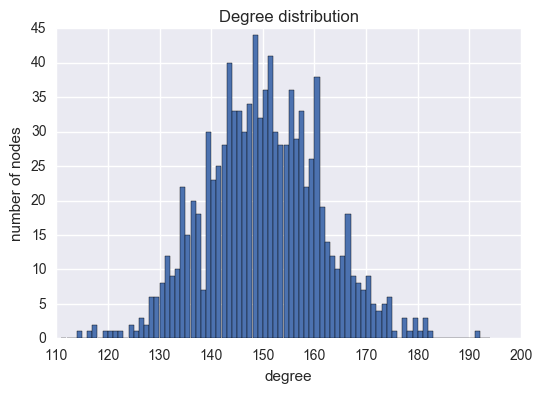

In [52]:
h,bins,patches = plt.hist(degree_sequence,bins=range(110,195))
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")

#### Connected Components

Two nodes of a graph belong in the same connected component if there is a path of edges of the graph that connects these two nodes.

In [53]:
cc= nx.connected_components(er)
print(type(cc))
print([len(s) for s in cc])

<class 'generator'>
[1000]


In [54]:
def  print_cc_sizes(g):
    cc = nx.connected_components(g)
    print([len(s) for s in cc])

#### Clustering coefficient

The **clustering coefficient of a node** is defined as the number of possible triangles centered in this node, divided by the total number of possible triangles in which this node can participate in. Formally, the clustering coefficient of a node $u$ is defined as $$c_u=\frac{2T(u)}{d(u)(d(u)-1)},$$
where $T(u)$ is the number of triangles through node $u$ and $d(u)$ is the degree of node $u$.

For more details for weighted graphs etc see:  

http://networkx.lanl.gov/reference/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering

The **average clustering coefficient** is the average clustering coefficient of all the nodes in the graph.

http://networkx.lanl.gov/reference/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

In [55]:
ccall = nx.clustering(er)
clustering_coefficient = nx.average_clustering(er)
clustering_coefficient

0.1500183597702627

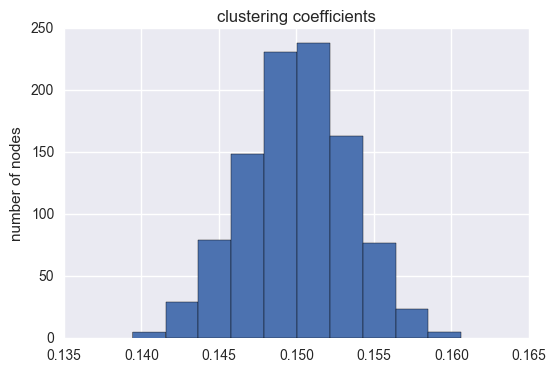

In [56]:
h,bins,patches = plt.hist(list(nx.clustering(er).values()))
plt.title('clustering coefficients')
plt.ylabel("number of nodes")

#### Triangles

1066


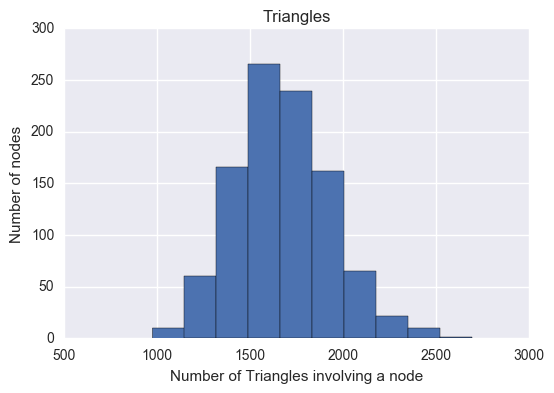

In [57]:
print(nx.triangles(er,0))
#print(nx.triangles(er))
h,bins, patches = plt.hist(list(nx.triangles(er).values()))
plt.title('Triangles')
plt.xlabel("Number of Triangles involving a node")
plt.ylabel("Number of nodes")

#### Diameter and average path length

The **diameter** of a graph is defined as the largest shortest path between any two nodes in the graph

In [58]:
print(nx.diameter(er))

2


The **average shortest path length** of a graph is defined as the average of all shortest path lengths in the graph

http://networkx.lanl.gov/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html

In [59]:
print(nx.average_shortest_path_length(er))

1.8501541541541542


__Watts-Strogatz graphs.__

In [60]:
ws=nx.watts_strogatz_graph(500,5,0.1)
print_cc_sizes(ws)

[500]


Degree distribution

In [61]:
degree_sequence=sorted(nx.degree(ws).values(),reverse=True) 
dmax=max(degree_sequence)
dmax

6

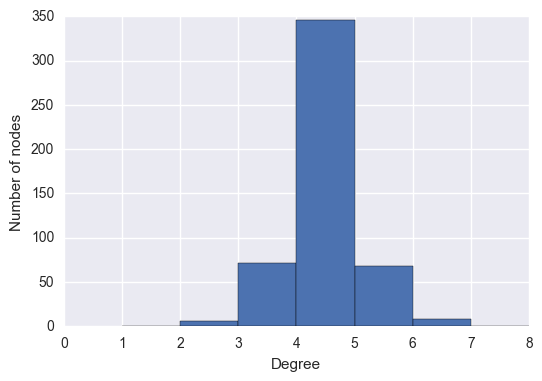

In [62]:
h,bins,patches = plt.hist(degree_sequence,bins=range(9))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

__Clustering coefficient__

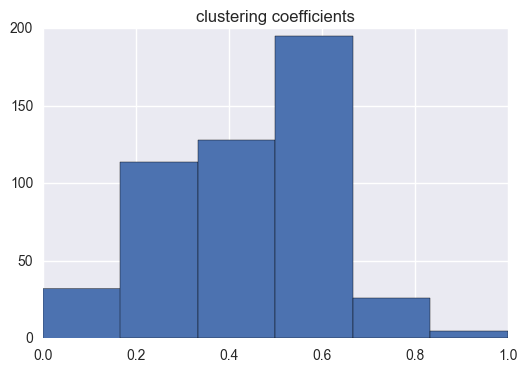

In [63]:
h,bins,patches = plt.hist(list(nx.clustering(ws).values()),bins=6)
plt.title('clustering coefficients')

__Average path length and diameter__

In [64]:
print('Diameter:', (nx.diameter(ws)))
print('Average shortest path length:', (nx.average_shortest_path_length(ws)))
print('Average clustering coefficient:', (nx.average_clustering(ws)))

Diameter: 15
Average shortest path length: 7.596529058116232
Average clustering coefficient: 0.37726666666666675


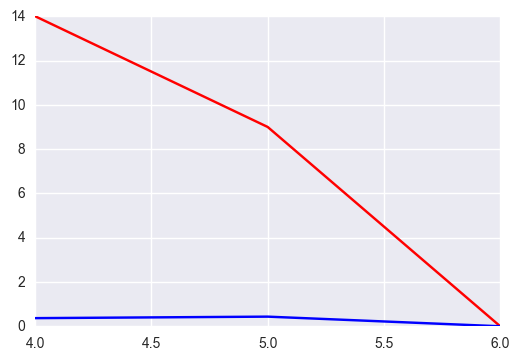

In [65]:
r = range(4,7)
d = np.zeros(len(r))
cc = np.zeros(len(r))
pl = np.zeros(len(r))
index = 0
for i in  r:
    ws=nx.watts_strogatz_graph(500,i,0.1)
    d[index] = nx.diameter(ws)
    cc[index] = nx.average_clustering(ws)
    pl[index] = nx.average_shortest_path_length(ws)
    index=+1
plt.plot(r,d,'r')
plt.plot(r,cc,'b')
#plt.plot(r,pl,'g');

#### Experimenting with Barabasi-Albert graphs  http://networkx.lanl.gov/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html

In [66]:
ba=nx.barabasi_albert_graph(500,5)
print_cc_sizes(ba)

[500]


Degree distribution

In [67]:
degree_sequence=sorted(nx.degree(ba).values(),reverse=True) 
dmax=max(degree_sequence)
dmax

92

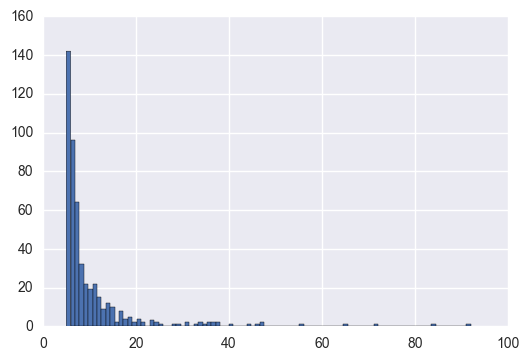

In [68]:
h,bins,patches = plt.hist(degree_sequence,bins=dmax)

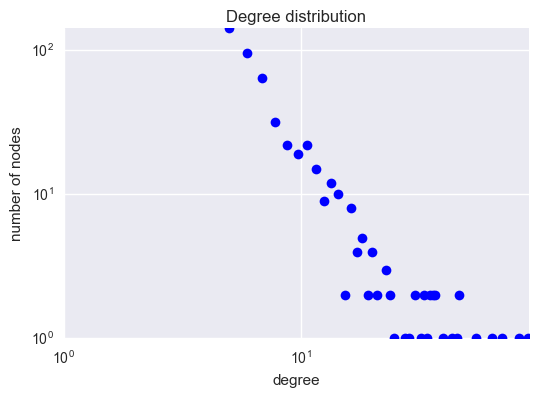

In [69]:
hmax=max(h)
plt.axis([1,dmax,1,hmax]) # set ranges
#x=compress(h,bins)    # remove bins with zero entries
#y=compress(h,h)       # remove corresponding entries
x=bins.compress(h)
y=h.compress(h)
plt.loglog(x,y,'bo')
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.show()